In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn nltk

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached sc

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from sklearn.feature_extraction.text import CountVectorizer

# Configure visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [5]:
# Load the dataset
# NOTE: Change the path below to where your CSV file is actually located
file_path = '../data/raw_analyst_ratings.csv' 

try:
    df = pd.read_csv(file_path)
    print(f"Data Loaded Successfully. Shape: {df.shape}")
    
    # Convert date column to datetime objects (UTC)
    # 'coerce' turns errors into NaT (Not a Time)
    df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
    
    # Display first few rows
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")

Data Loaded Successfully. Shape: (1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


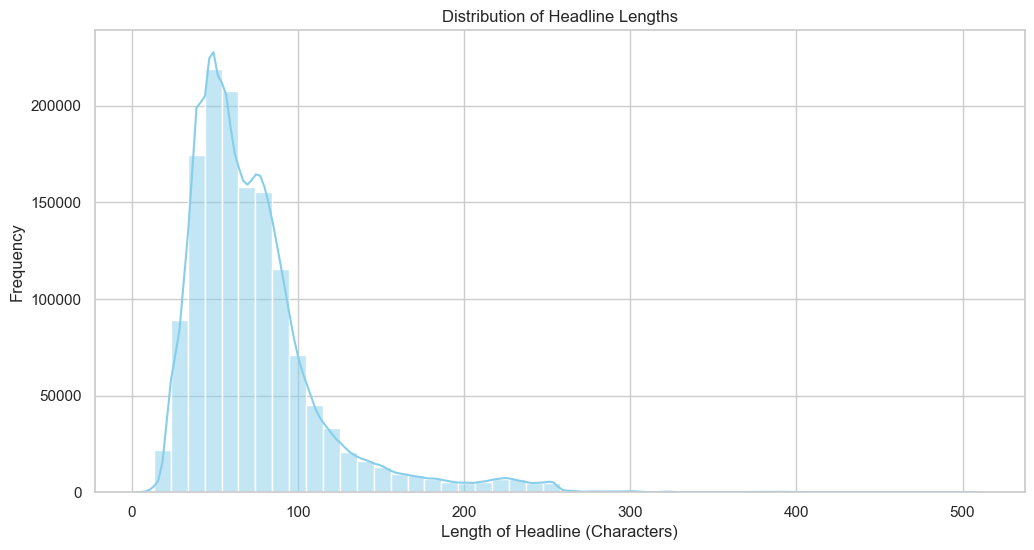

In [6]:
# Calculate headline lengths
df['headline_length'] = df['headline'].astype(str).apply(len)

# Display basic statistics
print("Headline Length Statistics:")
print(df['headline_length'].describe())

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline (Characters)')
plt.ylabel('Frequency')
plt.show()

Total Unique Publishers: 1034


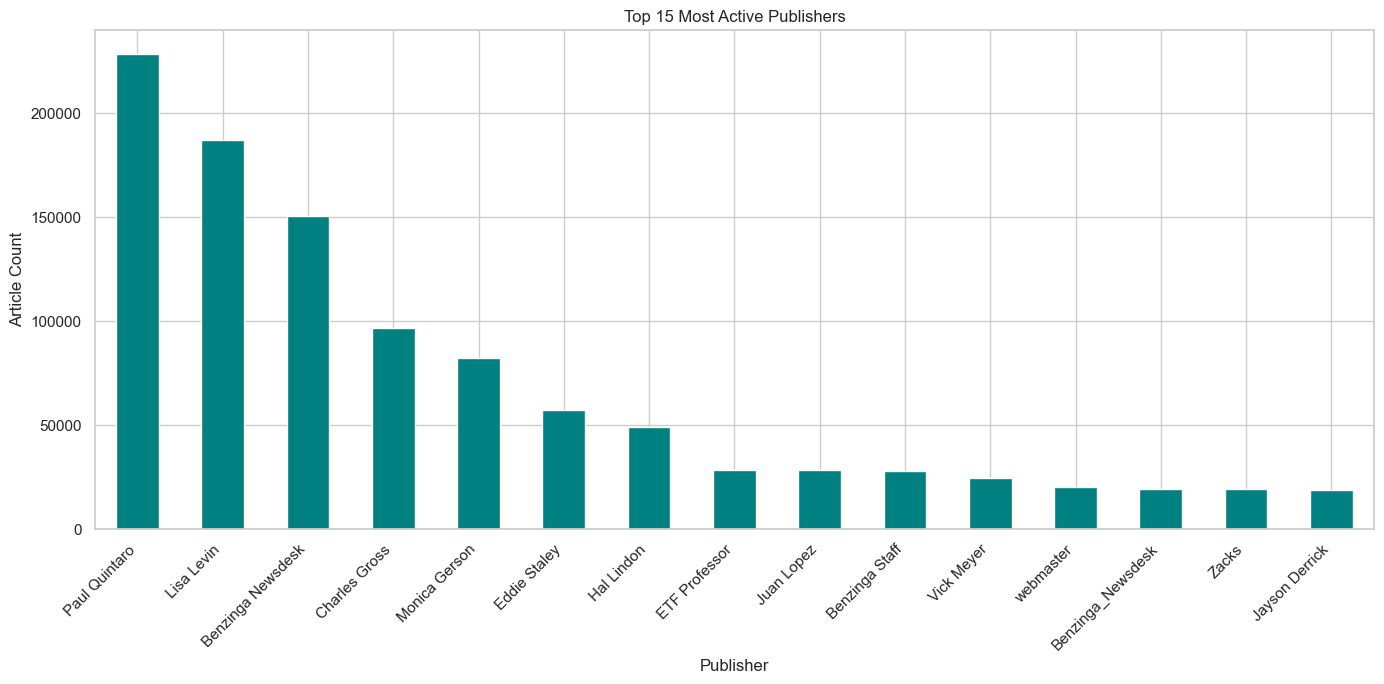

In [7]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

print(f"Total Unique Publishers: {len(publisher_counts)}")

# Plot Top 15 Publishers
plt.figure(figsize=(14, 7))
publisher_counts.head(15).plot(kind='bar', color='teal')
plt.title('Top 15 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

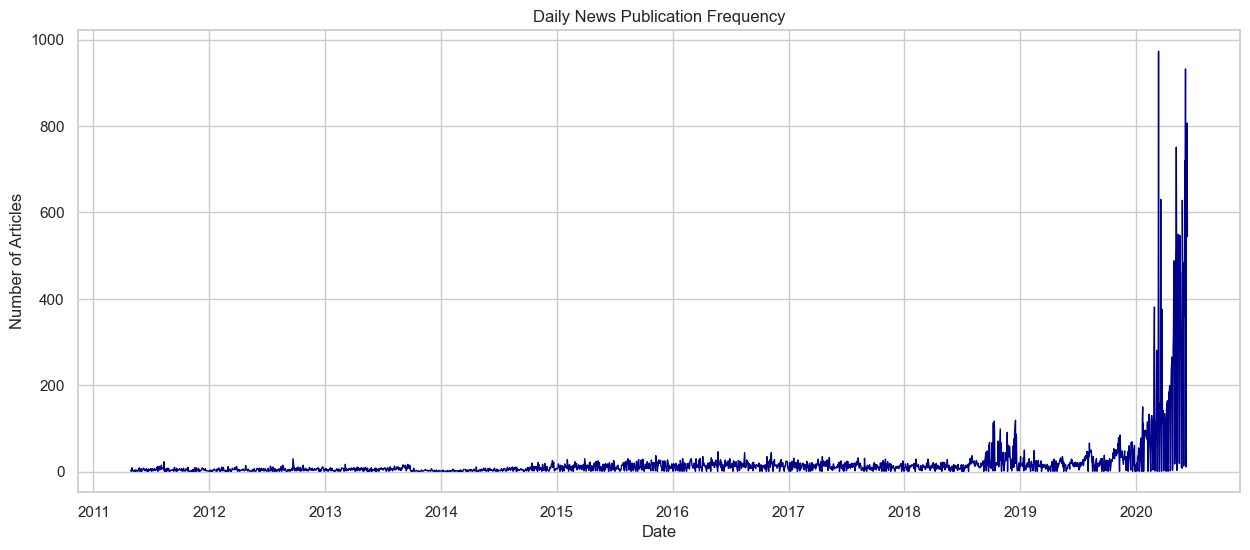

In [8]:
# 1. Daily Trends
# Group by date (converting datetime to just date)
daily_counts = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_counts.plot(color='darkblue', linewidth=1)
plt.title('Daily News Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

C:\Users\Maireg\AppData\Local\Temp\ipykernel_8992\2720318631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


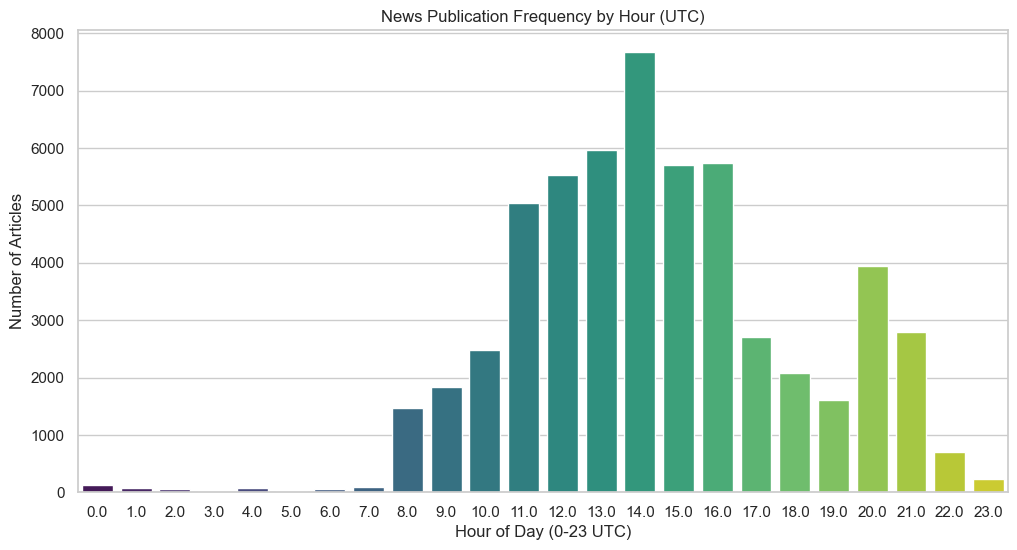

In [9]:
# Extract the hour from the date
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('News Publication Frequency by Hour (UTC)')
plt.xlabel('Hour of Day (0-23 UTC)')
plt.ylabel('Number of Articles')
plt.show()

# Insight: Check if there are spikes around 13:00-14:00 (US Market Open)

C:\Users\Maireg\AppData\Local\Temp\ipykernel_8992\528967839.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Phrase', data=df_phrases, palette='magma')


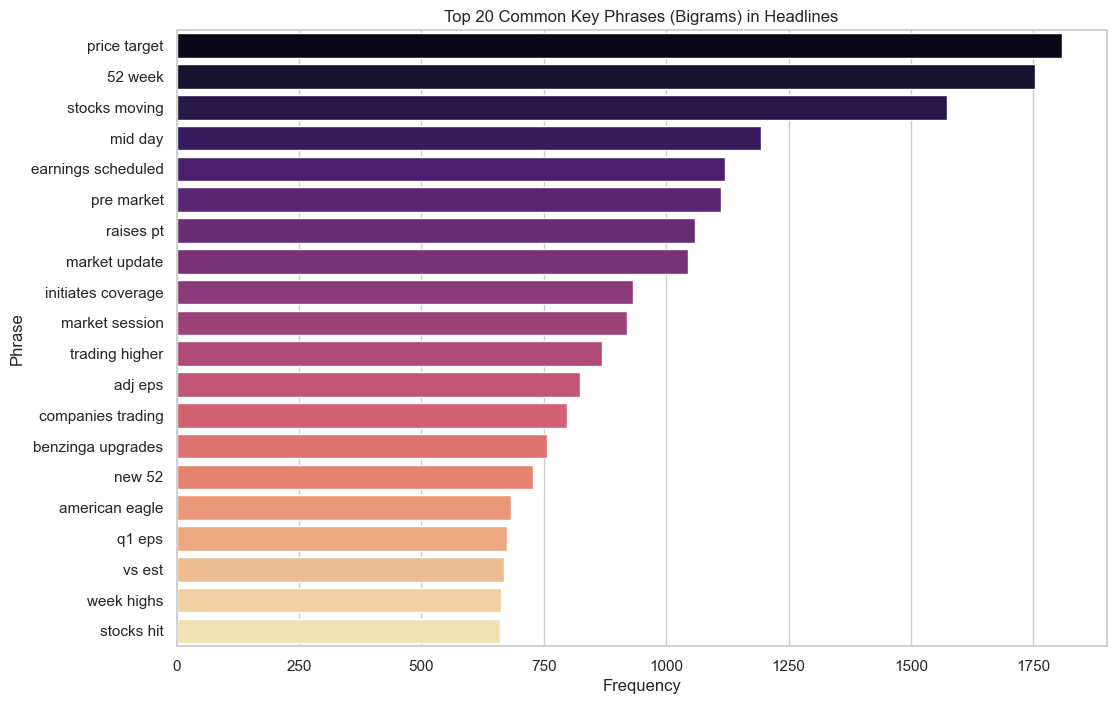

In [10]:
def get_top_ngrams(corpus, n=None, n_gram=2):
    # Create a vectorizer to count words, removing common English stop words
    vec = CountVectorizer(ngram_range=(n_gram, n_gram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 "Bigrams" (2-word phrases) from a sample of the data
# We sample top 50,000 rows for speed. Remove .head(50000) to run on full data (takes longer)
sample_headlines = df['headline'].dropna().head(50000)
common_phrases = get_top_ngrams(sample_headlines, 20, 2)

# Convert to DataFrame
df_phrases = pd.DataFrame(common_phrases, columns=['Phrase', 'Frequency'])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Phrase', data=df_phrases, palette='magma')
plt.title('Top 20 Common Key Phrases (Bigrams) in Headlines')
plt.show()

In [11]:
# Function to extract domain if the publisher looks like an email
def extract_domain(publisher):
    publisher = str(publisher)
    match = re.search(r'@([\w\.-]+)', publisher)
    if match:
        return match.group(1) # Returns just the domain (e.g., investopedia.com)
    return publisher

# Apply the function
df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Check active domains
domain_counts = df['publisher_domain'].value_counts()

print("Top 10 Publisher Domains (Cleaned):")
print(domain_counts.head(10))

Top 10 Publisher Domains (Cleaned):
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
